# Crime Data Iterations

Building a model for property crime prediction based on data from NY and other states in 2013.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline

In [2]:
# Function to help clean up data.
# Converts strings to numeric series.

def make_num(old_series):
    translator = str.maketrans('', '', string.punctuation)
    
    new_series = [str(num).translate(translator) for num in old_series]
    new_series = pd.to_numeric(new_series, errors='coerce')
    return pd.Series(new_series)

In [3]:
crime_ny = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv')
crime_or = pd.read_csv('oregon_by_city_2013.csv')

# Drop cities with NaN Population
crime_or = crime_or.drop(crime_or.index[crime_or['Population'].isnull()]).reset_index(drop=True)

In [4]:
clean_ny = pd.DataFrame()
clean_ny['City'] = crime_ny['City']

clean_or = pd.DataFrame()
clean_or['City'] = crime_or['City']

# Some columns are in an unfortunate format. Need to remove punctuation and convert to numeric.

translator = str.maketrans('', '', string.punctuation)

clean_ny['Population'] = make_num(crime_ny['Population'])
clean_ny['Robbery'] = make_num(crime_ny['Robbery'])

clean_ny['Murder'] = crime_ny['Murder and\nnonnegligent\nmanslaughter']

clean_ny['Rape'] = make_num(crime_ny['Rape\n(legacy\ndefinition)2'])
clean_ny['Assault'] = make_num(crime_ny['Aggravated\nassault'])
clean_ny['Burglary'] = make_num(crime_ny['Burglary'])
clean_ny['Larceny'] = make_num(crime_ny['Larceny-\ntheft'])
clean_ny['MVTheft'] = make_num(crime_ny['Motor\nvehicle\ntheft'])
clean_ny['PropertyCrime'] = make_num(crime_ny['Property\ncrime'])


clean_or['Population'] = make_num(crime_or['Population'])
clean_or['Robbery'] = make_num(crime_or['Robbery'])
clean_or['Murder'] = make_num(crime_or['Murder and\nnonnegligent\nmanslaughter'])

clean_or['Rape'] = crime_or[['Rape\n(legacy\ndefinition)2', 'Rape\n(revised\ndefinition)1']].max(axis=1)
clean_or['Rape'] = pd.to_numeric(clean_or['Rape'])

clean_or['Assault'] = make_num(crime_or['Aggravated\nassault'])
clean_or['Burglary'] = make_num(crime_or['Burglary'])
clean_or['Larceny'] = make_num(crime_or['Larceny-\ntheft'])
clean_or['MVTheft'] = make_num(crime_or['Motor\nvehicle\ntheft'])
clean_or['PropertyCrime'] = make_num(crime_or['Property\ncrime'])

In [5]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y_ny = clean_ny['PropertyCrime'].values.reshape(-1, 1)
X_ny = clean_ny.loc[:,'Population':'Assault']
regr.fit(X_ny, Y_ny)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_ny, Y_ny))


Coefficients: 
 [[  1.21189893e-02  -5.63689035e-01   7.48268123e+01   6.12845922e+01
   -1.32770779e+00]]

Intercept: 
 [ 32.86846523]

R-squared:
0.999002487804


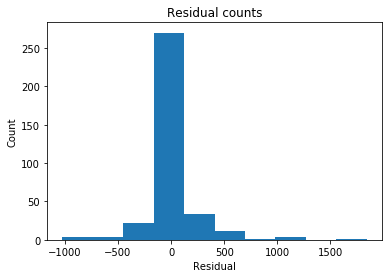

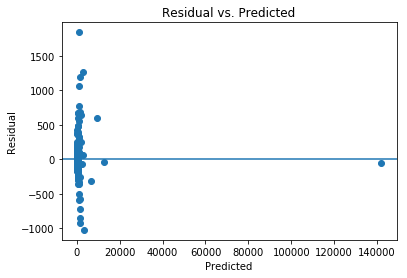

In [6]:
# Extract predicted values.
predicted = regr.predict(X_ny).ravel()
actual = clean_ny['PropertyCrime']

# Calculate the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Now applying the model trained on NY data to the OR dataset:


Coefficients: 
 [[  1.21189893e-02  -5.63689035e-01   7.48268123e+01   6.12845922e+01
   -1.32770779e+00]]

Intercept: 
 [ 32.86846523]

R-squared:
0.883834692716


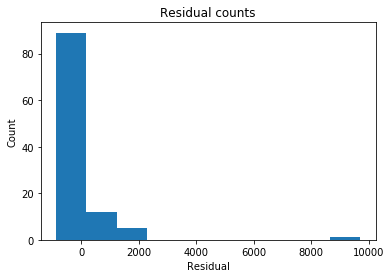

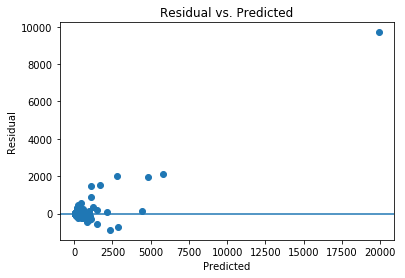

In [7]:
Y_or = clean_or['PropertyCrime'].values.reshape(-1, 1)
X_or = clean_or.loc[:,'Population':'Assault']

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_or, Y_or))

# Extract predicted values.
predicted = regr.predict(X_or).ravel()
actual = clean_or['PropertyCrime']

# Calculate the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Let's add one more state and then run a Cross Validation over all three states at the same time to see if we can do better.

In [8]:
crime_oh = pd.read_csv('ohio_by_city_2013.csv')

clean_oh = pd.DataFrame()
clean_oh['City'] = crime_oh['City']

In [9]:
clean_oh['Population'] = make_num(crime_oh['Population'])
clean_oh['Robbery'] = make_num(crime_oh['Robbery'])
clean_oh['Murder'] = make_num(crime_oh['Murder and\nnonnegligent\nmanslaughter'])

clean_oh['Rape'] = crime_oh[['Rape\n(legacy\ndefinition)2', 'Rape\n(revised\ndefinition)1']].max(axis=1)
clean_oh['Rape'] = pd.to_numeric(clean_oh['Rape'])

clean_oh['Assault'] = make_num(crime_oh['Aggravated\nassault'])
clean_oh['Burglary'] = make_num(crime_oh['Burglary'])
clean_oh['Larceny'] = make_num(crime_oh['Larceny-\ntheft'])
clean_oh['MVTheft'] = make_num(crime_oh['Motor\nvehicle\ntheft'])
clean_oh['PropertyCrime'] = make_num(crime_oh['Property\ncrime'])

clean_oh = clean_oh.fillna(0)


Coefficients: 
 [[  1.21189893e-02  -5.63689035e-01   7.48268123e+01   6.12845922e+01
   -1.32770779e+00]]

Intercept: 
 [ 32.86846523]

R-squared:
0.816051042105


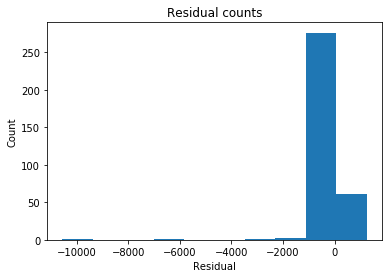

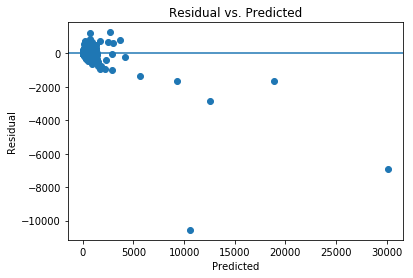

In [10]:
Y_oh = clean_oh['PropertyCrime'].values.reshape(-1, 1)
X_oh = clean_oh.loc[:,'Population':'Assault']

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_oh, Y_oh))

# Extract predicted values.
predicted = regr.predict(X_oh).ravel()
actual = clean_oh['PropertyCrime']

# Calculate the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## All together now

First we'll see what happens when we run the model using all the data, then we'll do cross-validation with n-folds.

In [11]:
clean_all = pd.concat([clean_ny, clean_or, clean_oh]).reset_index(drop=True)

clean_all.shape

(798, 10)


Coefficients: 
 [[  2.58645357e-02  -3.39469077e+00   5.98998649e+01   6.79982225e+01
   -3.32326290e+00]]

Intercept: 
 [-119.29266415]

R-squared:
0.990006794058


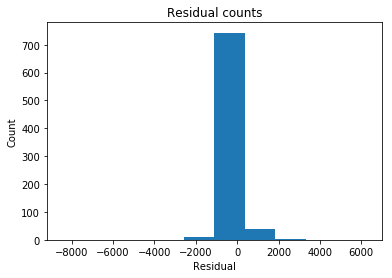

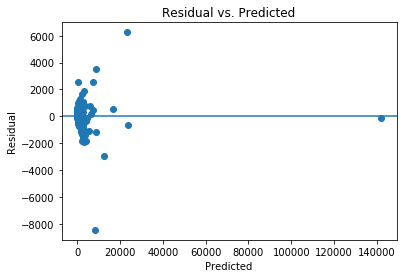

In [12]:
# Instantiate and fit our model.
regr_all = linear_model.LinearRegression()
Y_all = clean_all['PropertyCrime'].values.reshape(-1, 1)
X_all = clean_all.loc[:,'Population':'Assault']
regr_all.fit(X_all, Y_all)

# Inspect the results.
print('\nCoefficients: \n', regr_all.coef_)
print('\nIntercept: \n', regr_all.intercept_)
print('\nR-squared:')
print(regr_all.score(X_all, Y_all))

# Extract predicted values.
predicted = regr_all.predict(X_all).ravel()
actual = clean_all['PropertyCrime']

# Calculate the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [18]:
data = clean_all.loc[:,'Population':'Assault']
target = clean_all.loc[:,'PropertyCrime']

In [19]:
shuffled_indices = np.arange(len(data))
np.random.shuffle(shuffled_indices)

In [20]:
n_folds = 3 # 1 < n <= len(shuffled_indices)
fold_arrays = []
for i in range(n_folds):
    fold_arrays.append(shuffled_indices[(i*len(data)//n_folds):(i+1)*len(data)//n_folds])


Coefficients: 
 [[  2.30461391e-02   2.80290015e+00  -4.45917081e+01   7.71052932e+01
   -5.53455823e+00]]

Intercept: 
 [-96.49751873]

R-squared:
0.631135790659


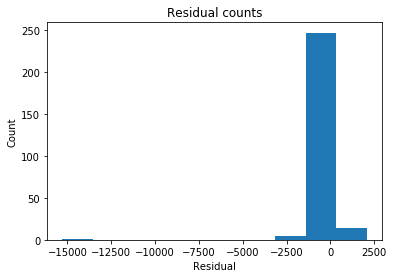

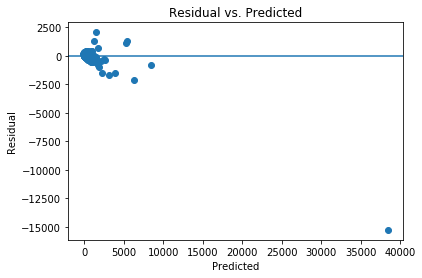


Coefficients: 
 [[  1.62223355e-02  -1.15147221e+00   4.18949930e+01   4.33624990e+01
    2.65284961e-01]]

Intercept: 
 [ 4.47698766]

R-squared:
0.902868825906


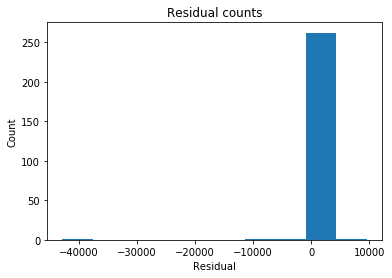

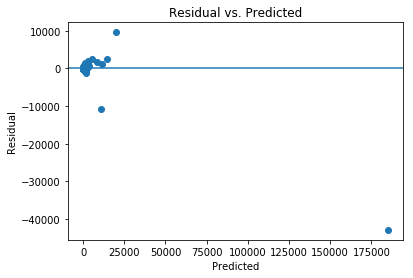


Coefficients: 
 [[  2.84072284e-02  -4.42419745e+00   6.66139833e+01   7.45433824e+01
   -3.67533297e+00]]

Intercept: 
 [-158.26331732]

R-squared:
0.754397876903


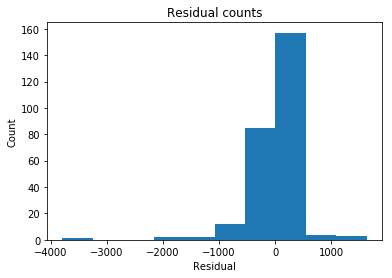

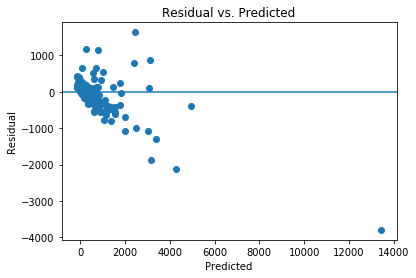

In [21]:
regr_iter = linear_model.LinearRegression()

for i in range(n_folds):
    test_data = data.loc[fold_arrays[i], :]
    test_target = target.loc[fold_arrays[i]].values.reshape(-1,1)
    train_data = data.drop(fold_arrays[i])
    train_target = target.drop(fold_arrays[i]).values.reshape(-1,1)
    
    regr_iter.fit(train_data, train_target)
    
    print('\nCoefficients: \n', regr_iter.coef_)
    print('\nIntercept: \n', regr_iter.intercept_)
    print('\nR-squared:')
    print(regr_iter.score(test_data, test_target))
    
    # Extract predicted values.
    predicted = regr_iter.predict(test_data).ravel().reshape(len(test_target), 1)
    actual = test_target

    # Calculate the residual.
    residual = actual - predicted

    plt.hist(residual)
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()

    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()


Using cross validation, our predictions become extremely sensitive to outliers. The training set that does not include NYC almost always does a bad job. We could try removing it from the dataset, or better yet, we could use substantially more data so that there are many large cities. These datasets are great - we could easily (with more data cleaning) including data from all 50 states, over multiple years. We have 800 data points here -- with another several thousand we could create a model that scales for large and small cities. 